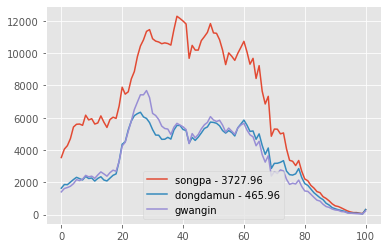

In [82]:
import pandas as pd

#천 단위 쉼표 제거 -> thousands = ','
df = pd.read_csv('week14_data/연령별인구현황.csv',encoding='cp949',index_col=0,thousands = ',')

df = df.drop(['서울특별시  (1100000000)'])
df=df - df.loc['서울특별시 광진구 (1121500000)']
df=df**2

del df['2020년12월_계_총인구수']
del df['2020년12월_계_연령구간인구수']
df['Total'] = (df.sum(axis=1)/100)**0.5

#인덱스 순서 저장
max_result = df['Total'][0]
max_num=0
min_result = df['Total'][0]
min_num=0

num=0
for row in df['Total'] :
    if(row > max_result):
        max_result = row
        max_num = num
    if(row < min_result and row != 0.0):
        min_result = row
        min_num = num
    num += 1

# print(df['Total'])
# print(max_result)
# print(max_num)
# print(min_result)
# print(min_num)

df1 = pd.read_csv('week14_data/연령별인구현황.csv',encoding='cp949',index_col=0,thousands = ',')
del df1['2020년12월_계_총인구수']
del df1['2020년12월_계_연령구간인구수']
df1 = df1.drop(['서울특별시  (1100000000)'])
df1 = df1.astype('int')

import numpy as np
numpy = df1.to_numpy()
#print(numpy[4])
# print(df1.loc[max_num+1])
# print(df1.loc[min_num+1])

import matplotlib.pyplot as plt
plt.style.use("ggplot")#격자 무늬 스타일 지정

plt.plot(numpy[max_num],label="songpa - 3727.96")
plt.plot(numpy[min_num],label="dongdamun - 465.96")
plt.plot(numpy[4],label="gwangin")#광진구
plt.legend()
plt.show()